In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cvxopt as cvx
from cvxopt.solvers import qp
from fractions import Fraction
import math

In [26]:
from itertools import combinations
def sub_lists(my_list):
	subs = []
	for i in range(0, len(my_list)+1):
	    temp = [list(x) for x in combinations(my_list, i)]
	    if len(temp)>0:
	        subs.extend(temp)
	return subs
def good_sub_lists(my_list):
    B= []
    for l in sub_lists(my_list):
        
        if len(l)<= 1:
            B.append(l)
        else:
            passed = True
            for i in range(0,len(l)-1):
                if l[i]>=l[i+1]:
                    passed = False
            if  passed:
                B.append(l)
    return B
def MISS(l): 
    miss = []
    for t  in  good_sub_lists(l):
        passed= True
        for s in  good_sub_lists(l):
            if all(x in s for x in t) == True:
                if all(x in t for x in s)== False:
                    passed = False
        if passed:
            miss.append(t)
    return miss
def MISSR(l):
    rows = []
    for s in MISS(l):
        row = len(l)*[0]
        for i in range(len(l)):
            if l[i] in s:
                row[i]=1        
        rows.append(row)
    return rows
def MISSI(l,s):
    row = []
    for i in range(len(l)):
        if l[i] in s:                 
            row.append(i+1)
    return row
def MISSNODE(l):
    rows = []
    for s in MISS(l):
        row = []
        for i in range(len(l)):
            if l[i] in s:
                row.append(i)        
        rows.append(row)
    return rows

In [27]:

def dual(l):
    m = len(l)
    misss =  MISSR(l)
    # initialize an empty list of rows for the augmented matrix
    rows = []
    # add rows corresponding to the constraints rho >= 0
    for i in range(1,len(l)+1):
        row = (m+1)*[0]
        row[i] = 1
        rows.append(row)   
    # add rows corresponding to the constraints N*rho >= 1
    for miss in misss:
        row = [-1] + miss
        rows.append(row)   
    # create the polyhedron in cdd
    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    ext = poly.get_generators()
    # list of dual objects
    dual = []
    # loop over extreme points and directions
    for i in range(ext.row_size):
    
        # skip extreme directions
        if ext[i][0] == 0:
            continue
        
        # add the vector representation of the dual object
        dual.append(ext[i][1:])
    print('MIRRS=',len(MISSR(l)))
    print('dual=',len(dual))
    return dual


In [28]:
# Efficient Python 3 Program to find
# inverse permutation.
 
# function to find inverse permutations
def inversePermutation(arr) :
    l = len(arr)
    # To store element to index mappings
    arr2 = [0] *l
     
    # Inserting position at their
    # respective element in second array
    for i in range(0,l) :
        arr2[arr[i] - 1] = i + 1
     
    return arr2

In [29]:
def DPG(l):
    G = nx.DiGraph()
    for i in range(len(l)):
        G.add_node(i)
    for i in range(len(l)):
        for j in range(len(l)):
            if i < j:
                if l[i]<l[j]:
                    passed= True
                    for k in range(i,j):
                        if l[i]<l[k]<l[j]:
                            passed = False
                    if passed:
                        G.add_edge(i,j)
    pos = nx.spring_layout(G)
    labels = {u:(u+1)  for u in G.nodes}
    nx.draw(G, pos, node_size=200, node_color='gray', edge_color='gray')
    nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
    S= []
    T= []
    for x in G.nodes():
        source = True
        sink = True
        for (u,v) in G.edges():
            if x == u:
                source = False
            if x == v:
                sink = False
        if source:
            T.append(x)
        if sink:
            S.append(x)
    
    return G, S, T

In [30]:
def CPD(G,S,T):
    G.add_node('s')
    G.add_node('t')
    for u in S:
        G.add_edge('s',u)
    for u in T:
        G.add_edge(u,'t')
    path = nx. all_simple_paths(G, 's', 't')
    P = []
    for u in path:
        P.append(u[1:-1])
    return P

[10  9 11  7  2  8  4  3  1  5  6]
7
[[0, 2], [1, 2], [3, 5], [4, 5], [8, 9, 10], [4, 6, 9, 10], [4, 7, 9, 10]]
[[0, 2], [1, 2], [3, 5], [4, 5], [4, 6, 9, 10], [4, 7, 9, 10], [8, 9, 10]]
7


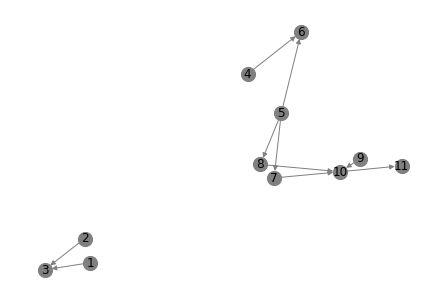

In [31]:
np.random.seed(56)
l =   np.random.permutation(range(1,12))
print(l)
print(len(MISS(l)))
print(MISSNODE(l))
G,S,T = DPG(l)
print(CPD(G,S,T))
print(len(CPD(G,S,T)))    

[5, 1, 3, 4, 2]
[[5], [1, 2], [1, 3, 4]]
3
[[0], [1, 4], [1, 2, 3]]
[0, 1]
[0, 3, 4]
[[0], [1, 2, 3], [1, 4]]
3


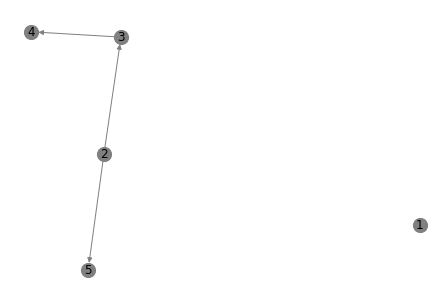

In [23]:
l= [5,1,3,4,2]
print(l)
print(MISS(l))
print(len(MISS(l)))
print(MISSNODE(l))
G,S,T = DPG(l)
print(S)
print(T)
print(CPD(G,S,T))
print(len(CPD(G,S,T)))  